UTS-1. Buatlah perhitungan yang meminimalkan waktu pengantaran menggunakan algoritma Ant-Colony Optimization atau Particle-Swarm Optimization. Dan Sebutkan berapa waktu tempuh terkecil-nya. (opsional : buatlah coding yang mengimplementasikan algoritma penyelesaian anda)

In [188]:
import numpy as np


locations = {
    'I': (25, 45),
    'F': (20, 30),
    'G': (5, 45),
    'J': (10, 40),
    'A': (5, 15),
    'E': (10, 25),
    'H': (30, 35),
    'B': (30, 10),
    'D': (20, 15),
    'C': (10, 5)
}

def calculate_distance(loc1, loc2):
    return np.sqrt((loc1[0] - loc2[0])**2 + (loc1[1] - loc2[1])**2)


def calculate_travel_time(loc1, loc2):
    distance = calculate_distance(loc1, loc2)
    return distance

class AntColonyOptimization:
    def __init__(self, locations, num_ants, num_iterations, alpha, beta, evaporation_rate):
        self.locations = locations
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone = np.ones((len(locations), len(locations)))


    def select_path(self, current_loc, visited_locs):
        unvisited_locs = [loc for loc in self.locations.keys() if loc not in visited_locs]
        probabilities = []
        total_prob = 0
        for loc in unvisited_locs:
            pheromone_factor = self.pheromone[list(self.locations.keys()).index(current_loc)][list(self.locations.keys()).index(loc)] ** self.alpha
            distance_factor = (1 / calculate_distance(self.locations[current_loc], self.locations[loc])) ** self.beta
            probabilities.append(pheromone_factor * distance_factor)
            total_prob += pheromone_factor * distance_factor
        probabilities = [prob / total_prob for prob in probabilities]
        selected_loc = np.random.choice(unvisited_locs, p=probabilities)
        return selected_loc

    def calculate_total_time(self, route):
        total_time = 0
        for i in range(len(route) - 1):
            total_time += calculate_travel_time(self.locations[route[i]], self.locations[route[i + 1]])
        return total_time

    def run(self):
        best_route = None
        best_time = float('inf')
        for iteration in range(self.num_iterations):
            for ant in range(self.num_ants):
                current_loc = 'I'
                visited_locs = ['I']
                while len(visited_locs) < len(self.locations):
                    next_loc = self.select_path(current_loc, visited_locs)
                    visited_locs.append(next_loc)
                    current_loc = next_loc
                travel_time = self.calculate_total_time(visited_locs)
                if travel_time < best_time:
                    best_route = visited_locs
                    best_time = travel_time

            for i in range(len(best_route) - 1):
                self.pheromone[list(self.locations.keys()).index(best_route[i])][list(self.locations.keys()).index(best_route[i + 1])] += 1 / best_time

            self.pheromone *= (1 - self.evaporation_rate)
        return best_route, best_time


num_ants = 10
num_iterations = 100
alpha = 1
beta = 2
evaporation_rate = 0.5


aco = AntColonyOptimization(locations, num_ants, num_iterations, alpha, beta, evaporation_rate)
best_route, best_time = aco.run()

print("Rute terbaik:", best_route)
print("Waktu tempuh terbaik:", best_time, "menit")


Rute terbaik: ['I', 'J', 'G', 'H', 'F', 'E', 'A', 'C', 'D', 'B']
Waktu tempuh terbaik: 119.85211520960557 menit


UTS-2. Buatlah perhitungan yang mengoptimalkan pendapatan abang delivery menggunakan algoritma Genetik. Dan sebutkan berapa total pendapatan si Abang hari itu. (opsional : buatlah coding yang mengimplementasikan algoritma penyelesaian anda)

In [189]:
import numpy as np
import random


titik = {'A': (5, 15), 'B': (30, 10), 'C': (10, 5), 'D': (20, 15),
         'E': (10, 25), 'F': (20, 30), 'G': (5, 45), 'H': (30, 35),
         'I': (25, 45), 'J': (10, 40)}


def hitung_jarak(titik1, titik2):
    return np.sqrt((titik1[0] - titik2[0]) ** 2 + (titik1[1] - titik2[1]) ** 2)

def hitung_panjang_rute(rute):
    panjang = 0
    for i in range(len(rute) - 1):
        panjang += hitung_jarak(titik[rute[i]], titik[rute[i+1]])
    return panjang

def inisialisasi_populasi(pop_size, titik):
    populasi = []
    titik_keys = list(titik.keys())
    for _ in range(pop_size):
        rute = random.sample(titik_keys, len(titik_keys))
        populasi.append(rute)
    return populasi

def seleksi_tournament(populasi, panjang_rute):
    kandidat1 = random.choice(populasi)
    kandidat2 = random.choice(populasi)
    if panjang_rute[tuple(kandidat1)] < panjang_rute[tuple(kandidat2)]:
        return kandidat1
    else:
        return kandidat2


def crossover(parent1, parent2):
    start = random.randint(0, len(parent1) - 2)
    end = random.randint(start + 1, len(parent1) - 1)
    child = [None] * len(parent1)
    child[start:end] = parent1[start:end]
    remaining = [item for item in parent2 if item not in child]
    idx = end
    for item in remaining:
        if None in child:
            while child[idx % len(parent1)] is not None:
                idx += 1
            child[idx % len(parent1)] = item
            idx += 1
    return child

def mutasi(rute):
    idx1, idx2 = random.sample(range(len(rute)), 2)
    rute[idx1], rute[idx2] = rute[idx2], rute[idx1]
    return rute

def algoritma_genetika(titik, pop_size, generations):
    populasi = inisialisasi_populasi(pop_size, titik)
    panjang_rute = {tuple(rute): hitung_panjang_rute(rute) for rute in populasi}
    for _ in range(generations):
        new_populasi = []
        for _ in range(pop_size):
            parent1 = seleksi_tournament(populasi, panjang_rute)
            parent2 = seleksi_tournament(populasi, panjang_rute)
            child = crossover(parent1, parent2)
            if random.random() < 0.1:  # Peluang mutasi 10%
                child = mutasi(child)
            new_populasi.append(child)
        populasi = new_populasi
        panjang_rute = {tuple(rute): hitung_panjang_rute(rute) for rute in populasi}
    best_rute = min(panjang_rute, key=panjang_rute.get)
    return best_rute, panjang_rute[best_rute]

pop_size = 50
generations = 100
best_rute, panjang_terpendek = algoritma_genetika(titik, pop_size, generations)

def algoritma_genetika(titik, pop_size, generations, start_point):
    populasi = inisialisasi_populasi(pop_size, titik)
    panjang_rute = {tuple(rute): hitung_panjang_rute(rute) for rute in populasi}
    for _ in range(generations):
        new_populasi = []
        for _ in range(pop_size):
            parent1 = seleksi_tournament(populasi, panjang_rute)
            parent2 = seleksi_tournament(populasi, panjang_rute)
            child = crossover(parent1, parent2)
            if random.random() < 0.1: 
                child = mutasi(child)
            new_populasi.append(child)
        populasi = new_populasi
        panjang_rute = {tuple(rute): hitung_panjang_rute(rute) for rute in populasi}
    best_rute = min(panjang_rute, key=panjang_rute.get)
    return best_rute, panjang_rute[best_rute]


start_point = 'I'
target_points = ['F', 'G', 'A']

for target_point in target_points:
    jarak = hitung_jarak(titik[start_point], titik[target_point])
    waktu_tempuh = jarak / 1  # Kecepatan 1 KM/Menit
    print(f"Waktu tempuh ke titik {target_point}: {waktu_tempuh} menit")



print("Rute terpendek:", best_rute)
print("Panjang rute terpendek:", panjang_terpendek, "KM")


Waktu tempuh ke titik F: 15.811388300841896 menit
Waktu tempuh ke titik G: 20.0 menit
Waktu tempuh ke titik A: 36.05551275463989 menit
Rute terpendek: ('I', 'H', 'F', 'A', 'C', 'B', 'D', 'E', 'J', 'G')
Panjang rute terpendek: 122.76329454927695 KM


bekal abang = Rp50000

total uang abang = bekal abang + sukses delivery + bonus tambahan

total uang abang = 50000 + 15000*10 + 50000 = Rp250000

bensin yang dihabiskan Rp 179000

penghasilan abang = total uang abang - bensin yang dihabiskan

penghasilan abang = 250000 - 147000 = Rp 103000


UTS-3. Jika ada peta jalan seperti pada gambar di gambar 2 dan jarak-garis-lurus (heuristic) dari kota2 itu ada di gambar 2,

# metode Breadth First Search

In [5]:
from collections import defaultdict
from pprint import pprint 

class FlightNetwork:
    def __init__(self):
        self.neighbors = defaultdict(list)
        self.cost = defaultdict(list)

    def add_flight(self, sumber, tujuan, harga):
        self.neighbors[sumber].append(tujuan)
        self.cost[sumber].append(harga)

    def show_flights(self):
        print("Destinasi:")
        pprint(dict(self.neighbors))
        print("Biaya:")
        pprint(dict(self.cost))

    def bfs(self, awal, tujuan):
        antrian = [[awal]]
        dikunjungi = set()

        while antrian:
            jalur = antrian.pop(0)
            node = jalur[-1]

            if node == tujuan:
                total_biaya = sum(self.cost[jalur[i]][self.neighbors[jalur[i]].index(jalur[i+1])] for i in range(len(jalur) - 1))
                return jalur, total_biaya, dikunjungi

            if node not in dikunjungi:
                print("Node yang Dikunjungi:", dikunjungi)
                dikunjungi.add(node)
                for next_node, _ in zip(self.neighbors[node], self.cost[node]):
                    jalur_baru = list(jalur)
                    jalur_baru.append(next_node)
                    antrian.append(jalur_baru)

        return "Tidak ditemukan rute", 0, dikunjungi


f = FlightNetwork()

f.add_flight('B', 'C', 87)
f.add_flight('C', 'A', 70)
f.add_flight('C', 'H', 92)
f.add_flight('H', 'D', 100)
f.add_flight('H', 'J', 142)
f.add_flight('J', 'F', 98)
f.add_flight('F', 'E', 86)
f.add_flight('J', 'G', 69)
f.add_flight('J', 'ABC', 85)
f.add_flight('I', 'ABC', 90)
f.add_flight('ABC', '13', 211)
f.add_flight('ABC', '12', 101)
f.add_flight('13', '4', 99)
f.add_flight('4', '0', 135)
f.add_flight('12', '11', 138)
f.add_flight('12', '9', 97)
f.add_flight('9', '4', 80)
f.add_flight('9', '11', 146)
f.add_flight('11', '8', 120)
f.add_flight('8', '7', 75)
f.add_flight('7', '6', 70)
f.add_flight('6', '3', 111)
f.add_flight('3', '2', 118)
f.add_flight('2', '4', 140)
f.add_flight('2', '5', 75)
f.add_flight('5', '1', 71)
f.add_flight('1', '4', 151)

f.add_flight('C', 'B', 87)
f.add_flight('A', 'C', 70)
f.add_flight('H', 'C', 92)
f.add_flight('D', 'H', 100)
f.add_flight('J', 'H', 142)
f.add_flight('F', 'J', 98)
f.add_flight('E', 'F', 86)
f.add_flight('G', 'J', 69)
f.add_flight('ABC', 'J', 85)
f.add_flight('ABC', 'I', 90)
f.add_flight('13', 'ABC', 211)
f.add_flight('12', 'ABC', 101)
f.add_flight('4', '13', 99)
f.add_flight('0', '4', 135)
f.add_flight('11', '12', 138)
f.add_flight('9', '12', 97)
f.add_flight('4', '9', 80)
f.add_flight('11', '9', 146)
f.add_flight('8', '11', 120)
f.add_flight('7', '8', 75)
f.add_flight('6', '7', 70)
f.add_flight('3', '6', 111)
f.add_flight('2', '3', 118)
f.add_flight('4', '2', 140)
f.add_flight('5', '2', 75)
f.add_flight('1', '5', 71)
f.add_flight('4', '1', 151)

# titik awal dan tujuan baru
titik_awal = 'I'
tujuan = '3'

# Cari rute dari titik awal ke tujuan
rute, jarak_total, node_dikunjungi = f.bfs(titik_awal, tujuan)
if rute != "Tidak ditemukan rute":
    print("Rute terbaik:", rute)
    print("Jarak Total:", jarak_total)
else:
    print("Tidak ditemukan rute")


Node yang Dikunjungi: set()
Node yang Dikunjungi: {'I'}
Node yang Dikunjungi: {'I', 'ABC'}
Node yang Dikunjungi: {'13', 'I', 'ABC'}
Node yang Dikunjungi: {'13', '12', 'I', 'ABC'}
Node yang Dikunjungi: {'13', '12', 'J', 'I', 'ABC'}
Node yang Dikunjungi: {'13', '12', 'J', 'I', '4', 'ABC'}
Node yang Dikunjungi: {'13', '12', 'J', 'I', '11', '4', 'ABC'}
Node yang Dikunjungi: {'13', '12', 'J', '9', 'I', '11', '4', 'ABC'}
Node yang Dikunjungi: {'13', '12', 'J', '9', 'I', '11', '4', 'F', 'ABC'}
Node yang Dikunjungi: {'13', 'G', '12', 'J', '9', 'I', '11', '4', 'F', 'ABC'}
Node yang Dikunjungi: {'13', 'G', '12', 'J', '9', 'I', '11', 'H', '4', 'F', 'ABC'}
Node yang Dikunjungi: {'13', 'G', '12', 'J', '9', 'I', '11', '0', 'H', '4', 'F', 'ABC'}
Node yang Dikunjungi: {'13', 'G', '12', 'J', '9', 'I', '11', '0', '2', 'H', '4', 'F', 'ABC'}
Node yang Dikunjungi: {'13', 'G', '12', 'J', '9', 'I', '11', '0', '2', 'H', '1', '4', 'F', 'ABC'}
Node yang Dikunjungi: {'13', 'G', '12', 'J', '9', 'I', '11', '0', '2

# metode Depth First Search

In [6]:
class FlightNetwork:
    def __init__(self):
        self.neighbors = defaultdict(list)
        self.cost = defaultdict(list)

    def add_flight(self, source, destination, price):
        self.neighbors[source].append(destination)
        self.cost[source].append(price)

    def dfs(self, start, goal, path=None, total_cost=0):
        if path is None:
            path = [start]
        if start == goal:
            return path, total_cost
        if start not in self.neighbors:
            return None, 0
        for next_node, cost in zip(self.neighbors[start], self.cost[start]):
            if next_node not in path:
                new_cost = total_cost + cost
                new_path, new_total_cost = self.dfs(next_node, goal, path + [next_node], new_cost)
                if new_path:
                    return new_path, new_total_cost
        return None, 0

    def dfs_with_steps(self, start, goal, path=None, total_cost=0, steps=None):
        if path is None:
            path = [start]
        if steps is None:
            steps = []
        if start == goal:
            return path, total_cost, steps
        if start not in self.neighbors:
            return None, 0, []
        for next_node, cost in zip(self.neighbors[start], self.cost[start]):
            if next_node not in path:
                new_cost = total_cost + cost
                new_path, new_total_cost, new_steps = self.dfs_with_steps(next_node, goal, path + [next_node], new_cost, steps + [(start, next_node)])
                if new_path:
                    return new_path, new_total_cost, new_steps
        return None, 0, []

    def display_search_steps(self, start, goal):
        print("Langkah Pencarian:")
        _, _, step = self.dfs_with_steps(start, goal)
        if step:
            for i, s in enumerate(step[:-1]):  
                print(f"{i+1}. Mulai dari {s[0]} dan pergi ke {s[1]}")
            print(f"{len(step)}. Sampai di {step[-1][1]}")  
        else:
            print("Tidak ditemukan langkah")

    def find_best_route(self, start, goal):
        route, total_distance = self.dfs(start, goal)
        if route:
            return route, total_distance
        else:
            return None, 0


f = FlightNetwork()

f.add_flight('B', 'C', 87)
f.add_flight('C', 'A', 70)
f.add_flight('C', 'H', 92)
f.add_flight('H', 'D', 100)
f.add_flight('H', 'J', 142)
f.add_flight('J', 'F', 98)
f.add_flight('F', 'E', 86)
f.add_flight('J', 'G', 69)
f.add_flight('J', 'ABC', 85)
f.add_flight('I', 'ABC', 90)
f.add_flight('ABC', '13', 211)
f.add_flight('ABC', '12', 101)
f.add_flight('13', '4', 99)
f.add_flight('4', '0', 135)
f.add_flight('12', '11', 138)
f.add_flight('12', '9', 97)
f.add_flight('9', '4', 80)
f.add_flight('9', '11', 146)
f.add_flight('11', '8', 120)
f.add_flight('8', '7', 75)
f.add_flight('7', '6', 70)
f.add_flight('6', '3', 111)
f.add_flight('3', '2', 118)
f.add_flight('2', '4', 140)
f.add_flight('2', '5', 75)
f.add_flight('5', '1', 71)
f.add_flight('1', '4', 151)

f.add_flight('C', 'B', 87)
f.add_flight('A', 'C', 70)
f.add_flight('H', 'C', 92)
f.add_flight('D', 'H', 100)
f.add_flight('J', 'H', 142)
f.add_flight('F', 'J', 98)
f.add_flight('E', 'F', 86)
f.add_flight('G', 'J', 69)
f.add_flight('ABC', 'J', 85)
f.add_flight('ABC', 'I', 90)
f.add_flight('13', 'ABC', 211)
f.add_flight('12', 'ABC', 101)
f.add_flight('4', '13', 99)
f.add_flight('0', '4', 135)
f.add_flight('11', '12', 138)
f.add_flight('9', '12', 97)
f.add_flight('4', '9', 80)
f.add_flight('11', '9', 146)
f.add_flight('8', '11', 120)
f.add_flight('7', '8', 75)
f.add_flight('6', '7', 70)
f.add_flight('3', '6', 111)
f.add_flight('2', '3', 118)
f.add_flight('4', '2', 140)
f.add_flight('5', '2', 75)
f.add_flight('1', '5', 71)
f.add_flight('4', '1', 151)

# titik awal dan tujuan baru
titik_awal = 'I'
tujuan = '3'


f.display_search_steps(titik_awal, tujuan)

# rute terbaik
rute_terbaik, jarak_total = f.find_best_route(titik_awal, tujuan)
if rute_terbaik:
    print("\nRute Terbaik:", rute_terbaik)
    print("Jarak Total:", jarak_total)
else:
    print("Tidak ditemukan rute terbaik")


Langkah Pencarian:
1. Mulai dari I dan pergi ke ABC
2. Mulai dari ABC dan pergi ke 13
3. Mulai dari 13 dan pergi ke 4
4. Mulai dari 4 dan pergi ke 9
5. Mulai dari 9 dan pergi ke 11
6. Mulai dari 11 dan pergi ke 8
7. Mulai dari 8 dan pergi ke 7
8. Mulai dari 7 dan pergi ke 6
9. Sampai di 3

Rute Terbaik: ['I', 'ABC', '13', '4', '9', '11', '8', '7', '6', '3']
Jarak Total: 1002


# metode Uniform Cost Search

In [14]:
from queue import PriorityQueue
from collections import defaultdict
from pprint import pprint

class FlightNetwork:
    def __init__(self):
        self.neighbors = defaultdict(list)
        self.cost = defaultdict(list)

    def add_flight(self, source, destination, price):
        self.neighbors[source].append(destination)
        self.cost[source].append(price)

    def show_flights(self):
        print("Destinations:")
        pprint(dict(self.neighbors))
        print("Cost:")
        pprint(dict(self.cost))

    def ucs(self, start, goal):
        frontier = PriorityQueue()
        frontier.put((0, start))
        came_from = {}
        cost_so_far = {start: 0}

        while not frontier.empty():
            current_cost, current_node = frontier.get()

            if current_node == goal:
                path = [current_node]
                while current_node != start:
                    current_node = came_from[current_node]
                    path.append(current_node)
                path.reverse()
                return path, cost_so_far[goal]

            for next_node, next_cost in zip(self.neighbors[current_node], self.cost[current_node]):
                new_cost = cost_so_far[current_node] + next_cost
                if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                    cost_so_far[next_node] = new_cost
                    priority = new_cost
                    frontier.put((priority, next_node))
                    came_from[next_node] = current_node
                    print(f"Ekspansi node {current_node}, tambahan: {next_node}, jarak total: {new_cost}")

        return "No route found", 0


f = FlightNetwork()

f.add_flight('B', 'C', 87)
f.add_flight('C', 'A', 70)
f.add_flight('C', 'H', 92)
f.add_flight('H', 'D', 100)
f.add_flight('H', 'J', 142)
f.add_flight('J', 'F', 98)
f.add_flight('F', 'E', 86)
f.add_flight('J', 'G', 69)
f.add_flight('J', 'ABC', 85)
f.add_flight('I', 'ABC', 90)
f.add_flight('ABC', '13', 211)
f.add_flight('ABC', '12', 101)
f.add_flight('13', '4', 99)
f.add_flight('4', '0', 135)
f.add_flight('12', '11', 138)
f.add_flight('12', '9', 97)
f.add_flight('9', '4', 80)
f.add_flight('9', '11', 146)
f.add_flight('11', '8', 120)
f.add_flight('8', '7', 75)
f.add_flight('7', '6', 70)
f.add_flight('6', '3', 111)
f.add_flight('3', '2', 118)
f.add_flight('2', '4', 140)
f.add_flight('2', '5', 75)
f.add_flight('5', '1', 71)
f.add_flight('1', '4', 151)

f.add_flight('C', 'B', 87)
f.add_flight('A', 'C', 70)
f.add_flight('H', 'C', 92)
f.add_flight('D', 'H', 100)
f.add_flight('J', 'H', 142)
f.add_flight('F', 'J', 98)
f.add_flight('E', 'F', 86)
f.add_flight('G', 'J', 69)
f.add_flight('ABC', 'J', 85)
f.add_flight('ABC', 'I', 90)
f.add_flight('13', 'ABC', 211)
f.add_flight('12', 'ABC', 101)
f.add_flight('4', '13', 99)
f.add_flight('0', '4', 135)
f.add_flight('11', '12', 138)
f.add_flight('9', '12', 97)
f.add_flight('4', '9', 80)
f.add_flight('11', '9', 146)
f.add_flight('8', '11', 120)
f.add_flight('7', '8', 75)
f.add_flight('6', '7', 70)
f.add_flight('3', '6', 111)
f.add_flight('2', '3', 118)
f.add_flight('4', '2', 140)
f.add_flight('5', '2', 75)
f.add_flight('1', '5', 71)
f.add_flight('4', '1', 151)

# titik awal dan tujuan baru
start_point = 'I'
destination = '3'

# Cari rute dari titik awal ke tujuan
route, total_distance = f.ucs(start_point, destination)
if route != "No route found":
    print("Route terbaik:", route)
    print("Total Distance:", total_distance)
else:
    print("No route found")


Ekspansi node I, tambahan: ABC, jarak total: 90
Ekspansi node ABC, tambahan: 13, jarak total: 301
Ekspansi node ABC, tambahan: 12, jarak total: 191
Ekspansi node ABC, tambahan: J, jarak total: 175
Ekspansi node J, tambahan: F, jarak total: 273
Ekspansi node J, tambahan: G, jarak total: 244
Ekspansi node J, tambahan: H, jarak total: 317
Ekspansi node 12, tambahan: 11, jarak total: 329
Ekspansi node 12, tambahan: 9, jarak total: 288
Ekspansi node F, tambahan: E, jarak total: 359
Ekspansi node 9, tambahan: 4, jarak total: 368
Ekspansi node H, tambahan: D, jarak total: 417
Ekspansi node H, tambahan: C, jarak total: 409
Ekspansi node 11, tambahan: 8, jarak total: 449
Ekspansi node 4, tambahan: 0, jarak total: 503
Ekspansi node 4, tambahan: 2, jarak total: 508
Ekspansi node 4, tambahan: 1, jarak total: 519
Ekspansi node C, tambahan: A, jarak total: 479
Ekspansi node C, tambahan: B, jarak total: 496
Ekspansi node 8, tambahan: 7, jarak total: 524
Ekspansi node 2, tambahan: 5, jarak total: 583


# metode Greedy Search

In [16]:
from queue import PriorityQueue
from collections import defaultdict

class FlightNetwork:
    def __init__(self):
        self.neighbors = defaultdict(list)
        self.cost = defaultdict(list)

    def add_flight(self, source, destination, price):
        self.neighbors[source].append(destination)
        self.cost[source].append(price)

    def show_flights(self):
        print("Destinations:")
        pprint(dict(self.neighbors))
        print("Cost:")
        pprint(dict(self.cost))

    def greedy_search(self, start, goal):
        frontier = PriorityQueue()
        frontier.put((0, start))
        came_from = {}
        cost_so_far = {start: 0}

        while not frontier.empty():
            current_node = frontier.get()[1]

            if current_node == goal:
                path = [current_node]
                while current_node != start:
                    current_node = came_from[current_node]
                    path.append(current_node)
                path.reverse()
                return path, cost_so_far[goal]

            for next_node, next_cost in zip(self.neighbors[current_node], self.cost[current_node]):
                new_cost = next_cost
                if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                    cost_so_far[next_node] = new_cost
                    priority = new_cost
                    frontier.put((priority, next_node))
                    came_from[next_node] = current_node
                    print(f"Ekspansi node {current_node}, tambahan: {next_node}, jarak total: {cost_so_far[next_node]}")

        return "No route found", 0


f = FlightNetwork()


f.add_flight('B', 'C', 87)
f.add_flight('C', 'A', 70)
f.add_flight('C', 'H', 92)
f.add_flight('H', 'D', 100)
f.add_flight('H', 'J', 142)
f.add_flight('J', 'F', 98)
f.add_flight('F', 'E', 86)
f.add_flight('J', 'G', 69)
f.add_flight('J', 'ABC', 85)
f.add_flight('I', 'ABC', 90)
f.add_flight('ABC', '13', 211)
f.add_flight('ABC', '12', 101)
f.add_flight('13', '4', 99)
f.add_flight('4', '0', 135)
f.add_flight('12', '11', 138)
f.add_flight('12', '9', 97)
f.add_flight('9', '4', 80)
f.add_flight('9', '11', 146)
f.add_flight('11', '8', 120)
f.add_flight('8', '7', 75)
f.add_flight('7', '6', 70)
f.add_flight('6', '3', 111)
f.add_flight('3', '2', 118)
f.add_flight('2', '4', 140)
f.add_flight('2', '5', 75)
f.add_flight('5', '1', 71)
f.add_flight('1', '4', 151)

# titik awal dan tujuan baru
start_point = 'I'
destination = '3'

# Cari rute dari titik awal ke tujuan
route, total_distance = f.greedy_search(start_point, destination)
if route != "No route found":
    print("Route:", route)
    print("Total Distance:", total_distance)
else:
    print("No route found")


Ekspansi node I, tambahan: ABC, jarak total: 90
Ekspansi node ABC, tambahan: 13, jarak total: 211
Ekspansi node ABC, tambahan: 12, jarak total: 101
Ekspansi node 12, tambahan: 11, jarak total: 138
Ekspansi node 12, tambahan: 9, jarak total: 97
Ekspansi node 9, tambahan: 4, jarak total: 80
Ekspansi node 4, tambahan: 0, jarak total: 135
Ekspansi node 11, tambahan: 8, jarak total: 120
Ekspansi node 8, tambahan: 7, jarak total: 75
Ekspansi node 7, tambahan: 6, jarak total: 70
Ekspansi node 6, tambahan: 3, jarak total: 111
Route: ['I', 'ABC', '12', '11', '8', '7', '6', '3']
Total Distance: 111


# metode A* (A-star)

In [13]:
from queue import PriorityQueue
from collections import defaultdict

class FlightNetwork:
    def __init__(self):
        self.neighbors = defaultdict(list)
        self.cost = defaultdict(list)

    def add_flight(self, source, destination, price):
        self.neighbors[source].append(destination)
        self.cost[source].append(price)

    def show_flights(self):
        print("Destinations:")
        pprint(dict(self.neighbors))
        print("Cost:")
        pprint(dict(self.cost))

    def heuristic(self, node, goal):
        # Menggunakan heuristik jarak langsung (straight-line distance)
        # di sini bisa diganti dengan heuristik yang sesuai untuk kasus Anda
        return 0  # Heuristik jarak langsung tidak diperlukan dalam kasus ini

    def astar_search(self, start, goal):
        frontier = PriorityQueue()
        frontier.put((0, start))
        came_from = {}
        cost_so_far = {start: 0}

        while not frontier.empty():
            current_node = frontier.get()[1]

            if current_node == goal:
                path = [current_node]
                while current_node != start:
                    current_node = came_from[current_node]
                    path.append(current_node)
                path.reverse()
                return path, cost_so_far[goal]

            for next_node, next_cost in zip(self.neighbors[current_node], self.cost[current_node]):
                new_cost = cost_so_far[current_node] + next_cost
                if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                    cost_so_far[next_node] = new_cost
                    priority = new_cost + self.heuristic(next_node, goal)
                    frontier.put((priority, next_node))
                    came_from[next_node] = current_node

                   
                    print(f"Step: {current_node} -> {next_node}, Cost: {new_cost}, Priority: {priority}")

        return "No route found", 0


f = FlightNetwork()


f.add_flight('B', 'C', 87)
f.add_flight('C', 'A', 70)
f.add_flight('C', 'H', 92)
f.add_flight('H', 'D', 100)
f.add_flight('H', 'J', 142)
f.add_flight('J', 'F', 98)
f.add_flight('F', 'E', 86)
f.add_flight('J', 'G', 69)
f.add_flight('J', 'ABC', 85)
f.add_flight('I', 'ABC', 90)
f.add_flight('ABC', '13', 211)
f.add_flight('ABC', '12', 101)
f.add_flight('13', '4', 99)
f.add_flight('4', '0', 135)
f.add_flight('12', '11', 138)
f.add_flight('12', '9', 97)
f.add_flight('9', '4', 80)
f.add_flight('9', '11', 146)
f.add_flight('11', '8', 120)
f.add_flight('8', '7', 75)
f.add_flight('7', '6', 70)
f.add_flight('6', '3', 111)
f.add_flight('3', '2', 118)
f.add_flight('2', '4', 140)
f.add_flight('2', '5', 75)
f.add_flight('5', '1', 71)
f.add_flight('1', '4', 151)

# Tentukan titik awal dan tujuan baru
start_point = 'I'
destination = '3'

# Cari rute dari titik awal ke tujuan
route, total_distance = f.astar_search(start_point, destination)
if route != "No route found":
    print("Route:", route)
    print("Total Distance:", total_distance)
else:
    print("No route found")


Step: I -> ABC, Cost: 90, Priority: 90
Step: ABC -> 13, Cost: 301, Priority: 301
Step: ABC -> 12, Cost: 191, Priority: 191
Step: 12 -> 11, Cost: 329, Priority: 329
Step: 12 -> 9, Cost: 288, Priority: 288
Step: 9 -> 4, Cost: 368, Priority: 368
Step: 11 -> 8, Cost: 449, Priority: 449
Step: 4 -> 0, Cost: 503, Priority: 503
Step: 8 -> 7, Cost: 524, Priority: 524
Step: 7 -> 6, Cost: 594, Priority: 594
Step: 6 -> 3, Cost: 705, Priority: 705
Route: ['I', 'ABC', '12', '11', '8', '7', '6', '3']
Total Distance: 705


UTS-4. Rancanglah suatu algoritma Fuzzy-Logic yang memiliki minimal 2 Input, 1 Output, beberapa aturan (rules) dan berkaitan dengan bidang aplikasi seperti yg tertera pada table 3 dibawah. 

4.18888888888889


c:\Users\ASUS\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


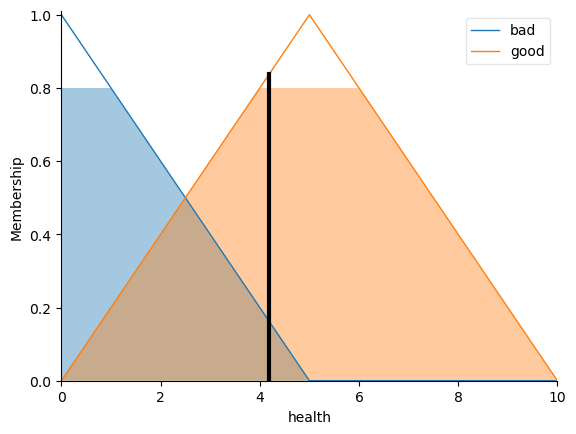

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


blood_pressure = ctrl.Antecedent(np.arange(0, 11, 1), 'blood_pressure')
blood_sugar = ctrl.Antecedent(np.arange(0, 11, 1), 'blood_sugar')
health = ctrl.Consequent(np.arange(0, 11, 1), 'health')


blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [0, 0, 5])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [0, 5, 10])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [5, 10, 10])

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [0, 0, 5])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [0, 5, 10])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [5, 10, 10])

health['bad'] = fuzz.trimf(health.universe, [0, 0, 5])
health['good'] = fuzz.trimf(health.universe, [0, 5, 10])


rule1 = ctrl.Rule(blood_pressure['low'] | blood_sugar['low'], health['bad'])
rule2 = ctrl.Rule(blood_pressure['low'] | blood_sugar['normal'], health['bad'])
rule3 = ctrl.Rule(blood_pressure['normal'] | blood_sugar['low'], health['bad'])
rule4 = ctrl.Rule(blood_pressure['high'] | blood_sugar['high'], health['bad'])
rule5 = ctrl.Rule(blood_pressure['normal'] | blood_sugar['normal'], health['good'])
rule6 = ctrl.Rule(blood_pressure['high'] | blood_sugar['normal'], health['good'])
rule7 = ctrl.Rule(blood_pressure['normal'] | blood_sugar['high'], health['good'])
rule8 = ctrl.Rule(blood_pressure['high'] | blood_sugar['low'], health['good'])


health_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
health_sim = ctrl.ControlSystemSimulation(health_ctrl)

health_sim.input['blood_pressure'] = 4
health_sim.input['blood_sugar'] = 7

health_sim.compute()

print(health_sim.output['health'])
health.view(sim=health_sim)
